In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

Mounted at /content/drive


###Dự đoán giá vàng

In [6]:
# 2. Đọc file csv và gắng index với giá Close
df_gold = pd.read_csv('/content/drive/MyDrive/DataSet/gold_price_2018_2024.csv')
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
# df1=df.reset_index()['Close']

In [8]:
df_gold

,Date,Value (USD per troy ounce)
0,2018-01-01,1307.018690
1,2018-01-02,1319.827953
2,2018-01-03,1311.501862
3,2018-01-04,1321.635371
4,2018-01-05,1319.589185
...,...,...
2247,2024-02-26,2031.609404
2248,2024-02-27,2033.313814
2249,2024-02-28,2032.653770
2250,2024-02-29,2036.199141


from matplotlib import pyplot as plt
_df_0['Value (USD per troy ounce)'].plot(kind='hist', bins=20, title='Value (USD per troy ounce)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Value (USD per troy ounce)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Value (USD per troy ounce)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Value (USD per troy ounce)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Value (USD per troy ounce)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Value (USD per troy ounce)'].plot(kind='line', figsize=(8, 4), title='Value (USD per troy ounce)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_gold=scaler.fit_transform(np.array(df_gold['Value (USD per troy ounce)']).reshape(-1,1))

#Chia tỉ lệ 7:3

In [10]:
# 4. Chia train test
train_size = int(0.7 * len(df_gold))
test_size = int(0.3 * len(df_gold))

train_data = df_gold[:train_size]
test_data = df_gold[train_size:train_size+test_size]

In [11]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 0s 19ms/step - loss: 2.4519e-04
Epoch 2/100
24/24 [==============================] - 0s 18ms/step - loss: 2.3873e-04
Epoch 3/100
24/24 [==============================] - 0s 19ms/step - loss: 2.5092e-04
Epoch 4/100
24/24 [==============================] - 0s 20ms/step - loss: 2.4298e-04
Epoch 5/100
24/24 [==============================] - 0s 21ms/step - loss: 4.4108e-04
Epoch 6/100
24/24 [==============================] - 0s 19ms/step - loss: 2.6610e-04
Epoch 7/100
24/24 [==============================] - 1s 29ms/step - loss: 2.3185e-04
Epoch 8/100
24/24 [==============================] - 1s 39ms/step - loss: 2.4115e-04
Epoch 9/100
24/24 [==============================] - 1s 30ms/step - loss: 2.3301e-04
Epoch 10/100
24/24 [==============================] - 1s 31ms/step - loss: 2.3692e-04
Epoch 11/100
24/24 [==============================] - 1s 34ms/step - loss: 2.8742e-04
Epoch 12/100
24/24 [==============================] - 1s 36ms/s

In [23]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

18/18 [==============================] - 0s 9ms/step


In [24]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [25]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))

print('Testing RMSE:', test_rmse)

Testing RMSE: 1897.312191441797


In [20]:
# # 13. Dự báo 30 ngày tiếp theo
# x_input=test_data[60:].reshape(1,-1)
# x_input.shape

# temp_input=list(x_input)
# temp_input=temp_input[0].tolist()

# from numpy import array

# lst_output=[]
# n_steps=100
# i=0
# while(i<30):

#     if(len(temp_input)>100):
#         #print(temp_input)
#         x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
#         x_input=x_input.reshape(1,-1)
#         x_input = x_input.reshape((1, n_steps, 1))
#         #print(x_input)
#         yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
#         temp_input.extend(yhat[0].tolist())
#         temp_input=temp_input[1:]
#         #print(temp_input)
#         lst_output.extend(yhat.tolist())
#         i=i+1
#     else:
#         x_input = x_input.reshape((1, n_steps,1))
#         yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
#         temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
#         lst_output.extend(yhat.tolist())
#         i=i+1


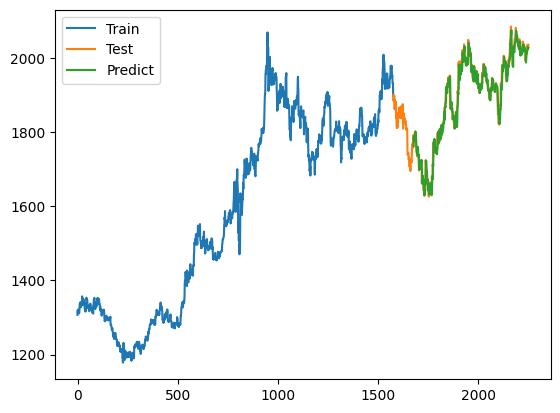

In [36]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Chia tỉ lệ 8:2

Epoch 1/100
27/27 [==============================] - 3s 39ms/step - loss: 0.0318
Epoch 2/100
27/27 [==============================] - 1s 20ms/step - loss: 0.0017
Epoch 3/100
27/27 [==============================] - 1s 19ms/step - loss: 8.4980e-04
Epoch 4/100
27/27 [==============================] - 0s 18ms/step - loss: 7.2375e-04
Epoch 5/100
27/27 [==============================] - 1s 18ms/step - loss: 6.7770e-04
Epoch 6/100
27/27 [==============================] - 1s 19ms/step - loss: 6.6978e-04
Epoch 7/100
27/27 [==============================] - 1s 19ms/step - loss: 6.4259e-04
Epoch 8/100
27/27 [==============================] - 0s 18ms/step - loss: 6.1692e-04
Epoch 9/100
27/27 [==============================] - 0s 18ms/step - loss: 6.1818e-04
Epoch 10/100
27/27 [==============================] - 1s 20ms/step - loss: 6.0625e-04
Epoch 11/100
27/27 [==============================] - 1s 23ms/step - loss: 5.8330e-04
Epoch 12/100
27/27 [==============================] - 1s 22ms/step - lo

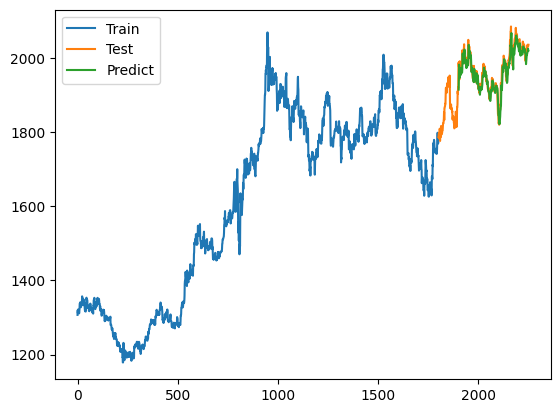

In [37]:
# 4. Chia train test
train_size = int(0.8 * len(df_gold))
test_size = int(0.2 * len(df_gold))

train_data = df_gold[:train_size]
test_data = df_gold[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Chia tỉ lệ 9:1

In [38]:
# 4. Chia train test
train_size = int(0.9 * len(df_gold))
test_size = int(0.1 * len(df_gold))

train_data = df_gold[:train_size]
test_data = df_gold[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
31/31 [==============================] - 3s 28ms/step - loss: 0.0344
Epoch 2/100
31/31 [==============================] - 1s 38ms/step - loss: 0.0014
Epoch 3/100
31/31 [==============================] - 1s 32ms/step - loss: 8.7216e-04
Epoch 4/100
31/31 [==============================] - 1s 32ms/step - loss: 7.4233e-04
Epoch 5/100
31/31 [==============================] - 1s 35ms/step - loss: 6.6175e-04
Epoch 6/100
31/31 [==============================] - 1s 43ms/step - loss: 6.0290e-04
Epoch 7/100
31/31 [==============================] - 1s 26ms/step - loss: 5.4763e-04
Epoch 8/100
31/31 [==============================] - 1s 31ms/step - loss: 5.1621e-04
Epoch 9/100
31/31 [==============================] - 1s 37ms/step - loss: 4.8816e-04
Epoch 10/100
31/31 [==============================] - 1s 34ms/step - loss: 4.6812e-04
Epoch 11/100
31/31 [==============================] - 1s 39ms/step - loss: 4.4780e-04
Epoch 12/100
31/31 [==============================] - 1s 36ms/step - lo

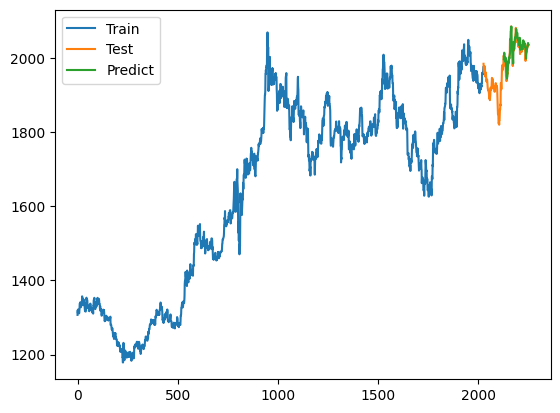

In [41]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Dự đoán giá bạc

In [45]:
# 2. Đọc file csv và gắng index với giá Close
df_silver = pd.read_csv('/content/drive/MyDrive/DataSet/silver_price_2018_2024.csv')
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
# df1=df.reset_index()['Close']

In [46]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_silver=scaler.fit_transform(np.array(df_silver['Value (USD per troy ounce)']).reshape(-1,1))

#Chia tỉ lệ 7:3


In [47]:
# 4. Chia train test
train_size = int(0.7 * len(df_silver))
test_size = int(0.3 * len(df_silver))

train_data = df_silver[:train_size]
test_data = df_silver[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
24/24 [==============================] - 3s 20ms/step - loss: 0.0105
Epoch 2/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0017
Epoch 3/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 4/100
24/24 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 5/100
24/24 [==============================] - 0s 18ms/step - loss: 0.0017
Epoch 6/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0010
Epoch 7/100
24/24 [==============================] - 0s 18ms/step - loss: 9.5222e-04
Epoch 8/100
24/24 [==============================] - 1s 24ms/step - loss: 9.4171e-04
Epoch 9/100
24/24 [==============================] - 1s 25ms/step - loss: 8.7785e-04
Epoch 10/100
24/24 [==============================] - 1s 24ms/step - loss: 8.1665e-04
Epoch 11/100
24/24 [==============================] - 1s 43ms/step - loss: 8.1110e-04
Epoch 12/100
24/24 [==============================] - 1s 42ms/step - loss: 7.6724e-04
E

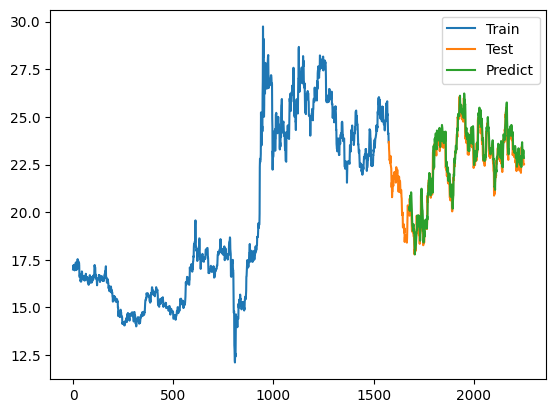

In [48]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Chia tỉ lệ 8:2

In [49]:
# 4. Chia train test
train_size = int(0.8 * len(df_silver))
test_size = int(0.2 * len(df_silver))

train_data = df_silver[:train_size]
test_data = df_silver[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
27/27 [==============================] - 3s 40ms/step - loss: 0.0498
Epoch 2/100
27/27 [==============================] - 1s 42ms/step - loss: 0.0016
Epoch 3/100
27/27 [==============================] - 1s 38ms/step - loss: 0.0011
Epoch 4/100
27/27 [==============================] - 1s 21ms/step - loss: 9.8533e-04
Epoch 5/100
27/27 [==============================] - 0s 18ms/step - loss: 9.4680e-04
Epoch 6/100
27/27 [==============================] - 0s 18ms/step - loss: 8.6237e-04
Epoch 7/100
27/27 [==============================] - 0s 18ms/step - loss: 8.1527e-04
Epoch 8/100
27/27 [==============================] - 0s 18ms/step - loss: 8.1186e-04
Epoch 9/100
27/27 [==============================] - 0s 18ms/step - loss: 7.4281e-04
Epoch 10/100
27/27 [==============================] - 0s 18ms/step - loss: 7.1427e-04
Epoch 11/100
27/27 [==============================] - 0s 18ms/step - loss: 6.8500e-04
Epoch 12/100
27/27 [==============================] - 0s 18ms/step - loss: 

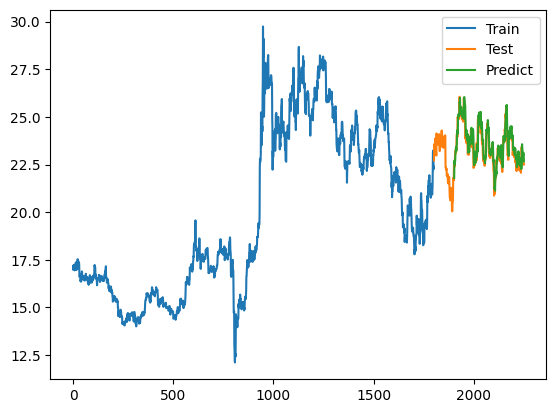

In [50]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Chia tỉ lệ 9:1

In [51]:
# 4. Chia train test
train_size = int(0.9 * len(df_silver))
test_size = int(0.1 * len(df_silver))

train_data = df_silver[:train_size]
test_data = df_silver[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
27/27 [==============================] - 2s 18ms/step - loss: 0.0536
Epoch 2/100
27/27 [==============================] - 1s 22ms/step - loss: 0.0032
Epoch 3/100
27/27 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 4/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0024
Epoch 5/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 6/100
27/27 [==============================] - 1s 20ms/step - loss: 0.0020
Epoch 7/100
27/27 [==============================] - 1s 19ms/step - loss: 0.0020
Epoch 8/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0019
Epoch 9/100
27/27 [==============================] - 1s 33ms/step - loss: 0.0017
Epoch 10/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0016
Epoch 11/100
27/27 [==============================] - 1s 30ms/step - loss: 0.0014
Epoch 12/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0014
Epoch 13/100
27/27 [=====

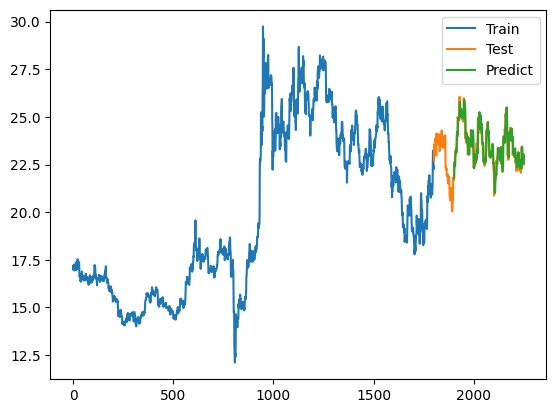

In [52]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

##Dự đoán giá Platinum


In [55]:
# 2. Đọc file csv và gắng index với giá Close
df_platium = pd.read_csv('/content/drive/MyDrive/DataSet/platium_price_2018_2024.csv')
df_platium['Date'] = pd.to_datetime(df_platium['Date'])
# df1=df.reset_index()['Close']

In [56]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df_platium=scaler.fit_transform(np.array(df_platium['Value (USD per troy ounce)']).reshape(-1,1))

#Chia tỉ lệ 7:3

In [57]:
# 4. Chia train test
train_size = int(0.7 * len(df_platium))
test_size = int(0.3 * len(df_platium))

train_data = df_platium[:train_size]
test_data = df_platium[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
24/24 [==============================] - 2s 19ms/step - loss: 0.0241
Epoch 2/100
24/24 [==============================] - 0s 20ms/step - loss: 0.0014
Epoch 3/100
24/24 [==============================] - 0s 17ms/step - loss: 9.7778e-04
Epoch 4/100
24/24 [==============================] - 1s 33ms/step - loss: 8.2995e-04
Epoch 5/100
24/24 [==============================] - 1s 34ms/step - loss: 7.9111e-04
Epoch 6/100
24/24 [==============================] - 1s 36ms/step - loss: 7.7290e-04
Epoch 7/100
24/24 [==============================] - 1s 36ms/step - loss: 7.5361e-04
Epoch 8/100
24/24 [==============================] - 1s 40ms/step - loss: 6.5754e-04
Epoch 9/100
24/24 [==============================] - 1s 37ms/step - loss: 6.3912e-04
Epoch 10/100
24/24 [==============================] - 1s 31ms/step - loss: 6.3471e-04
Epoch 11/100
24/24 [==============================] - 1s 23ms/step - loss: 5.9631e-04
Epoch 12/100
24/24 [==============================] - 1s 27ms/step - lo

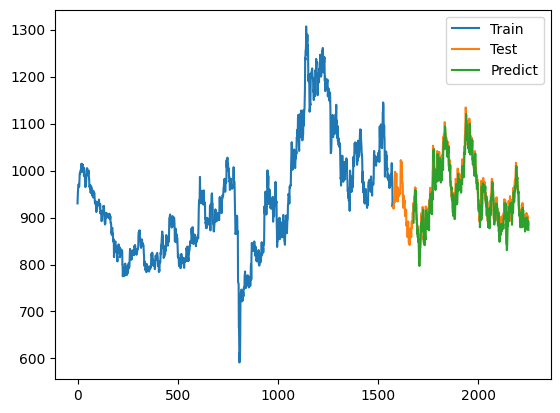

In [58]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Chia tỉ lệ 8:2

In [59]:
# 4. Chia train test
train_size = int(0.8 * len(df_platium))
test_size = int(0.2 * len(df_platium))

train_data = df_platium[:train_size]
test_data = df_platium[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
27/27 [==============================] - 2s 18ms/step - loss: 0.1030
Epoch 2/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0060
Epoch 3/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0035
Epoch 4/100
27/27 [==============================] - 1s 27ms/step - loss: 0.0028
Epoch 5/100
27/27 [==============================] - 1s 32ms/step - loss: 0.0023
Epoch 6/100
27/27 [==============================] - 1s 38ms/step - loss: 0.0020
Epoch 7/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0018
Epoch 8/100
27/27 [==============================] - 1s 33ms/step - loss: 0.0018
Epoch 9/100
27/27 [==============================] - 1s 36ms/step - loss: 0.0016
Epoch 10/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0014
Epoch 11/100
27/27 [==============================] - 0s 17ms/step - loss: 0.0013
Epoch 12/100
27/27 [==============================] - 0s 18ms/step - loss: 0.0014
Epoch 13/100
27/27 [=====

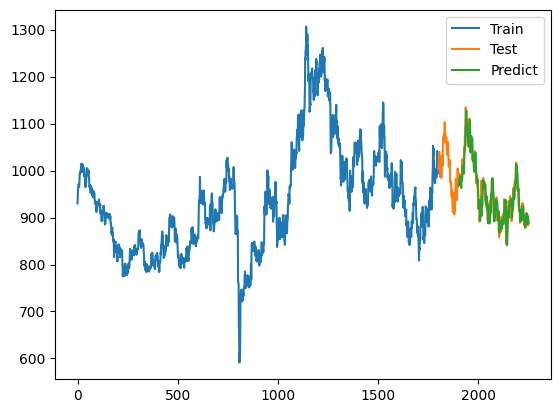

In [60]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()

#Chia tỉ lệ 9:1

In [61]:
# 4. Chia train test
train_size = int(0.9 * len(df_platium))
test_size = int(0.1 * len(df_platium))

train_data = df_platium[:train_size]
test_data = df_platium[train_size:train_size+test_size]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

#12 Đánh giá độ chính xác thuật toán
test_rmse = np.sqrt(np.mean((y_pred - ytest) ** 2))
test_mae = np.mean(np.abs(y_pred - ytest))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)



Epoch 1/100
31/31 [==============================] - 2s 19ms/step - loss: 0.0362
Epoch 2/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0032
Epoch 3/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0023
Epoch 4/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 5/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0015
Epoch 6/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0013
Epoch 7/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0014
Epoch 8/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0011
Epoch 9/100
31/31 [==============================] - 1s 20ms/step - loss: 0.0010
Epoch 10/100
31/31 [==============================] - 1s 20ms/step - loss: 9.5050e-04
Epoch 11/100
31/31 [==============================] - 1s 18ms/step - loss: 8.1872e-04
Epoch 12/100
31/31 [==============================] - 1s 18ms/step - loss: 7.4936e-04
Epoch 13/100


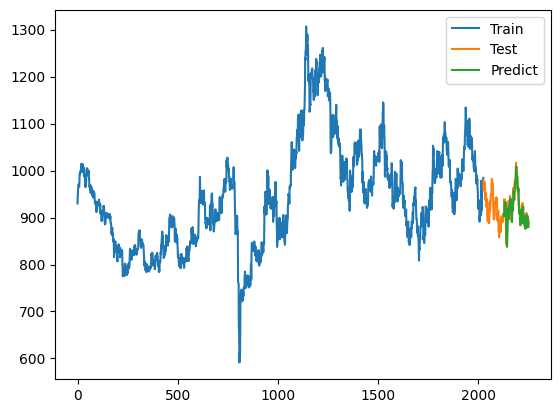

In [62]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size, step=1)

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size, step=1)

plt.legend(['Train','Test','Predict'])
plt.show()